In [1]:
import pandas as pd
import numpy as np

## 데이터 로드

In [2]:
data = pd.read_csv('train.csv')

### 제외단지 제거

In [3]:
data = data.loc[(data['단지코드'] != 'C2085') & (data['단지코드'] != 'C1397') & (data['단지코드'] != 'C2431') & (data['단지코드'] != 'C1649') & (data['단지코드'] != 'C1036') & (data['단지코드'] != 'C2675')].reset_index(drop=True)
data = data.loc[(data['단지코드'] != 'C2335') & (data['단지코드'] != 'C1327') & (data['단지코드'] != 'C1095') & (data['단지코드'] != 'C2051') & (data['단지코드'] != 'C1218') & (data['단지코드'] != 'C1894') & (data['단지코드'] != 'C2483') & (data['단지코드'] != 'C1502') & (data['단지코드'] != 'C1988')].reset_index(drop=True)

### 장단기 구분 그룹핑

#### 초장기 ; 국민임대 30년 / 공공임대 50년 / 영구임대 50년 / 공공분양
#### 장기 ; 장기전세 20년 / 공공임대 10년 분납 / 공공임대 10년 / 
#### 단기 ; 행복주택 / 공공임대 5년 / 임대상가 10년

In [4]:
period = np.where((data.공급유형 == '국민임대')|(data.공급유형 == '공공임대(50년)')|(data.공급유형 == '영구임대')|(data.공급유형 == '공공분양'),
        'exL',
        np.where((data.공급유형 == '장기전세')|(data.공급유형 == '공공임대(분납)')|(data.공급유형 == '공공임대(10년)'),
                'L', 'S'))

data['period'] = period

### 전용면적 역시, 어느정도 그룹핑 필요

#### 10 단위로 끊고, 상한80 하한 10 넣어줌

In [5]:
data['전용면적'] = data['전용면적']//10*10

data['전용면적'].describe()

count    2869.000000
mean       38.536075
std        32.287561
min        10.000000
25%        30.000000
50%        30.000000
75%        50.000000
max       580.000000
Name: 전용면적, dtype: float64

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전용면적', ylabel='Density'>

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50857 missing from cur

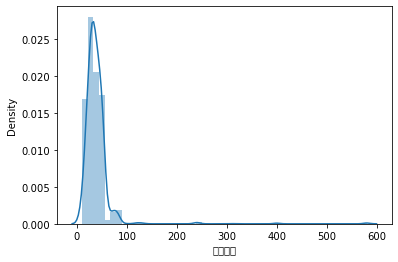

In [7]:
sns.distplot(data['전용면적'])

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전용면적', ylabel='Density'>

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50857 missing from cur

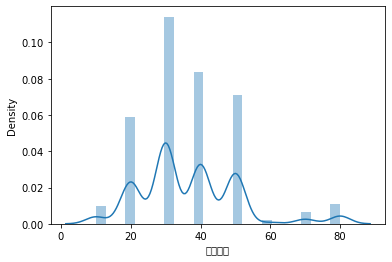

In [8]:
idx = data[data['전용면적']>80].index
data.loc[idx, '전용면적'] = 80

sns.distplot(data['전용면적'])

## 단지코드 - 임대건물구분 매핑

In [9]:
df1 = pd.DataFrame(data.groupby('단지코드').sum()['전용면적별세대수'].reset_index()['단지코드'], columns = ['단지코드'])
temp = data.groupby(['단지코드', '임대건물구분']).sum()['전용면적별세대수'].reset_index()

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '아파트'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left')

df1.columns = ['단지코드','아파트세대수']

df1 = df1.merge(temp.loc[temp['임대건물구분'] == '상가'].reset_index(drop=True)[['단지코드','전용면적별세대수']], on = '단지코드', how = 'left' )

df1.columns = ['단지코드','아파트세대수', '상가세대수']

df1 = df1.fillna(0)

### 총세대수 처리

In [10]:
temp = data[['단지코드', '총세대수']].drop_duplicates()
df1 = temp.merge(df1, on = '단지코드', how = 'left')

In [11]:
df1['세대수합차이'] = df1['총세대수'] - df1['아파트세대수'] - df1['상가세대수']
df1['상가세대수'] = np.where((df1['세대수합차이'] != 0) & (df1['세대수합차이'] <= 14),
                       df1['상가세대수']+df1['세대수합차이'], df1['상가세대수'])

In [12]:
bigdif = ['C1490', 'C2497', 'C2620', 'C1344', 
          'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']

In [13]:
df1['상가비율'] = df1['상가세대수']/df1['총세대수']
df1['아파트비율'] = df1['아파트세대수']/df1['총세대수']

df1.loc[df1['세대수합차이'] == 0].mean(), df1.loc[df1['단지코드'].isin(bigdif)].mean()

(총세대수      730.284182
 아파트세대수    728.823056
 상가세대수       1.461126
 세대수합차이      0.000000
 상가비율        0.001542
 아파트비율       0.998458
 dtype: float64,
 총세대수      681.555556
 아파트세대수    444.333333
 상가세대수       1.111111
 세대수합차이    236.111111
 상가비율        0.001472
 아파트비율       0.617735
 dtype: float64)

### 부족치 대부분이 아파트임을 비율상 유추할 수 있다. 따라서 아파트로 채움

In [14]:
df1['아파트세대수'] = np.where(df1['세대수합차이']>0, df1['아파트세대수']+df1['세대수합차이'],
                        df1['아파트세대수'])

In [15]:
df1.drop(['세대수합차이', '상가비율','아파트비율'], axis = 1, inplace = True)

## 단지코드 - 기본정보 매핑


#### 제외 : 임대건물구분(df1), 전용면적별세대수, 전용면적, 공급유형, 자격유형
#### 포함 : 총세대수(이미포함), 단지코드, 지역, 공가수, 도보 10분거리 내 지하철역 수(환승노선 수 반영),  도보 10분거리 내 버스정류장 수, 단지내주차면수, 등록차량수

In [16]:
temp = data[['단지코드', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', \
                     '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']].drop_duplicates()


df1 = df1.merge(temp, on = '단지코드', how='left')

### 도보 10분거리 내 지하철역 수(환승노선 수 반영) 결측 처리

#### 지하철 역 수는 해당 지역 평균을 찾아보자

In [17]:
df1.loc[df1['지역'] == '충청남도'].mean()

총세대수                            557.473684
아파트세대수                          553.473684
상가세대수                             4.210526
공가수                               8.578947
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0.000000
도보 10분거리 내 버스정류장 수                3.368421
단지내주차면수                         332.842105
등록차량수                           288.526316
dtype: float64

In [18]:
df1.loc[df1['지역'] == '대전광역시'].mean()

총세대수                            1024.960000
아파트세대수                          1020.440000
상가세대수                              5.120000
공가수                               11.520000
도보 10분거리 내 지하철역 수(환승노선 수 반영)       0.588235
도보 10분거리 내 버스정류장 수                 4.720000
단지내주차면수                          745.280000
등록차량수                            647.040000
dtype: float64

#### 충남 다 0이니 걍 0으로

#### 대전광역시 17개 중 10곳이 1, 따라서 0혹은 1로 대체해도 무방

#### 충남 0, 대전 1로 가자

In [19]:
df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = np.where(
    (df1['지역']=='충청남도')&(df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()),
    0,
    df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
)
df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = np.where(
    (df1['지역']=='대전광역시')&(df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()),
    1,
    df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)']
)

df1.loc[df1['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]

,단지코드,총세대수,아파트세대수,상가세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


## 자격유형 / 공급유형 ; 

#### 공급유형
#### 1)단지코드 - 공급유형cat

In [20]:
temp = data.groupby(['단지코드', 'period']).sum().reset_index()

temp1 = temp.loc[temp['period'] == 'exL'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', '초장기세대수']
df1 = df1.merge(temp1, on = '단지코드', how = 'left')

temp2 = temp.loc[temp['period'] == 'L'][['단지코드', '전용면적별세대수']]
temp2.columns = ['단지코드', '장기세대수']
df1 = df1.merge(temp2, on = '단지코드', how = 'left')

temp1 = temp.loc[temp['period'] == 'S'][['단지코드', '전용면적별세대수']]
temp1.columns = ['단지코드', '단기세대수']
df1 = df1.merge(temp1, on = '단지코드', how = 'left')

df1 = df1.fillna(0)

#### 2)공급유형 cat 여부 컬럼 ★

In [21]:
df3 = pd.DataFrame(df1.단지코드)
temp = data.groupby(['단지코드', 'period']).sum().reset_index() #단지코드-period별 데이터
for i in data.period.unique():
    temp1 = temp[temp.period == i]
    temp1['공급유형_{}'.format(i)] =1
    temp1 = temp1[['단지코드', '공급유형_{}'.format(i)]]
    df3 = df3.merge(temp1, on='단지코드', how='left')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
df3 = df3.fillna(0)
df1 = df1.merge(df3, on='단지코드', how='left')

#### 3)단지코드 - 공급유형

In [23]:
for i in data.공급유형.unique():
    temp = data[data.공급유형 ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')

In [24]:
df1 = df1.fillna(0)

## 자격유형

#### 단지코드 - 자격유형cat

In [25]:
ls=[]
for i in data.공급유형.unique():
    temp = data[data.공급유형 == i]
    cert = temp.자격유형.unique()
    ls.append([i, cert])
    
pd.DataFrame(ls)

,0,1
0,국민임대,"[A, B, E, G, H]"
1,공공임대(50년),[A]
2,영구임대,"[C, E, F, I, A]"
3,임대상가,[D]
4,공공임대(10년),[A]
5,공공임대(분납),[A]
6,장기전세,[A]
7,공공분양,[D]
8,행복주택,"[J, K, L, M, N, O]"
9,공공임대(5년),[A]


- A : 공공임대(50년), 공공임대(10년), 공공임대(분납), 장기전세, 공공임대(5년) - 
- D : 임대상가, 공공분양 - 
- A, C, E, F, I : 영구임대
- J, K, L, M, N, O : 행복주택
- A, B, E, G, H : 국민임대

In [26]:
data['자격유형_cat'] = np.where(data.공급유형 =='행복주택', 'JKLMNO',
        np.where(data.공급유형 == '국민임대', 'ABEGH',
                np.where(data.공급유형 =='영구임대', 'ACEFI',
                        np.where((data.공급유형 =='임대상가') | (data.공급유형 =='공공분양'), 'D', 'A'))))

In [27]:
for i in data['자격유형_cat'].unique():
    temp = data[data.자격유형_cat ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')
    
df1 = df1.fillna(0)

In [28]:
data['자격유형_cat'].unique()

array(['ABEGH', 'A', 'ACEFI', 'D', 'JKLMNO'], dtype=object)

### 전용면적 그룹
- 상한선 80, 하한선 10
- 구간 10으로
- 이미 그룹핑해둠

In [29]:
data.전용면적 = data.전용면적.astype('int64')

In [30]:
for i in data.sort_values('전용면적').전용면적.unique():
    temp = data[data.전용면적 ==i].groupby('단지코드').sum().reset_index()[['단지코드', '전용면적별세대수']]
    temp.columns = ['단지코드', '전용면적_{}_세대수'.format(i)]
    df1 = df1.merge(temp,on='단지코드', how='left')
df1 = df1.fillna(0)

## 아파트/상가 여부 칼럼

In [31]:
df2 = pd.DataFrame(data.groupby('단지코드').sum().reset_index()['단지코드'], columns=['단지코드']) #단지코드 데이터프레임
temp = data.groupby(['단지코드', '임대건물구분']).sum().reset_index() #단지코드-임대건물구분별 데이터프레임
#아파트
apart = temp[temp.임대건물구분 =='아파트'] 
apart['임대건물구분_아파트'] = 1
apart = apart[['단지코드', '임대건물구분_아파트']]
#상가
store = temp[temp.임대건물구분=='상가']
store['임대건물구분_상가'] =1
store = store[['단지코드', '임대건물구분_상가']]
#merge
df2 = df2.merge(apart, on='단지코드', how='left')
df2 = df2.merge(store, on='단지코드', how='left')
df2 = df2.fillna(0)
df2.임대건물구분_상가= df2.임대건물구분_상가.astype('int64')
#df1 - df2 merge
df1 = df1.merge(df2, on='단지코드', how='left')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가'],
      dtype='object')

In [33]:
df1.shape

(411, 41)

In [34]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가'],
      dtype='object')

### 나이/성별 인구수 ★
- 나이대별로 합치는건 결과에 그다지 영향 안 미침. 그대로 붙여도 무관

In [35]:
ageinfo = pd.read_csv('age_gender_info.csv')

age = pd.DataFrame()
for i in range(11):
    age['지역'] = ageinfo['지역']
    age['{}0대'.format(i)] = ageinfo.iloc[:, (2*i)+1] + ageinfo.iloc[:, 2*i+2]

df1 = df1.merge(age, on='지역', how='left')

### 1인당 자동차등록수 ★


In [36]:
car_2019 = pd.read_csv('1인당자동차_2019.csv', encoding='euc-kr', header=1)

car_2019.columns = ['지역', '1인당_자동차등록대수', '자동차등록대수', '주민등록인구']
car_2019['1인당자동차'] = car_2019.자동차등록대수 / car_2019.주민등록인구
car_2019 = car_2019[['지역', '1인당자동차']]
df1 = df1.merge(car_2019, on='지역', how='left')

In [37]:
df1.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차'],
      dtype='object')

In [38]:
df1.shape

(411, 53)

In [39]:
df1.columns = ['단지코드', '총세대수', '아파트세대수', '상가세대수', '지역', '공가수',
       '지하철', '버스', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차']

### 버스정류장 수 이상치 정리 ★

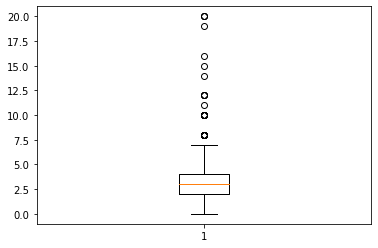

In [40]:
plt.boxplot(df1['버스'])
plt.show()

In [41]:
df1[['지하철', '버스']].describe()

,지하철,버스
count,411.000000,411.000000
mean,0.143552,3.708029
std,0.402827,2.836592
min,0.000000,0.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,0.000000,4.000000
max,3.000000,20.000000


In [42]:
df1['지하철'] = np.where(df1['지하철'] == 0, 0, 1)
df1['버스'] = np.where(df1['버스']>=7,7,df1['버스'])

## 지역 인코딩

In [43]:
df2 = pd.concat([df1.drop('지역', axis = 1),pd.get_dummies(df1.지역)], axis = 1)

In [44]:
df2.shape

(411, 68)

In [45]:
df2.columns

Index(['단지코드', '총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수',
       '등록차량수', '초장기세대수', '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L',
       '국민임대_세대수', '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

## 모델링

In [46]:
# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
from sklearn.linear_model import LinearRegression   ## 회귀 분석
from sklearn.svm import SVC                         ## svm 분류모델
from sklearn.tree import DecisionTreeClassifier     ## Tree 분류모델
from sklearn.ensemble import RandomForestClassifier ## RandomForet
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.ensemble import RandomForestRegressor  ## RandomForet 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 다중공선성 확인

In [47]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 85)

pandas version:  1.2.5


In [48]:
x = df2.columns.difference(['등록차량수'], sort=False).difference(['단지코드'], sort=False)
# x = ['임대건물구분_아파트', '임대건물구분_상가', '공가수', '지하철역 수', '버스정류장 수', '단지내주차면수']
X= df2[x]
y = pd.DataFrame(df2['등록차량수'])

In [49]:
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  등록차량수   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     55.67
Date:                Tue, 27 Jul 2021   Prob (F-statistic):          4.92e-134
Time:                        09:06:58   Log-Likelihood:                -2621.4
No. Observations:                 411   AIC:                             5329.
Df Residuals:                     368   BIC:                             5502.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
총세대수              2.5539      1.555      1.643

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,inf,총세대수
1,inf,아파트세대수
2,26.925446,상가세대수
3,2.013108,공가수
4,1.810327,지하철
5,1.221231,버스
6,22.477092,단지내주차면수
7,inf,초장기세대수
8,inf,장기세대수
9,inf,단기세대수


## Modeling

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [54]:
from sklearn.ensemble import VotingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
ereg = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
ereg.fit(X_train, y_train)
    
a=[]

a.append(round(mean_absolute_error(y_test, reg1.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg2.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg3.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg4.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, reg5.predict(X_test)),3))
a.append(round(mean_absolute_error(y_test, ereg.predict(X_test)),3))

result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
result_models.loc[len(result_models)] = a

result_models

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2909300.974054087, tolerance: 4886.986187987013
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1732857.378868428, tolerance: 4886.986187987013
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,115.67,120.101,120.91,117.021,131.29,109.708


In [55]:
## 98.125	104.986	123.408	94.652	105.206	86.821
## 이거로 해서 111.9 나옴

In [56]:
Xx = pd.read_csv('0727_try1.csv', index_col = 0)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


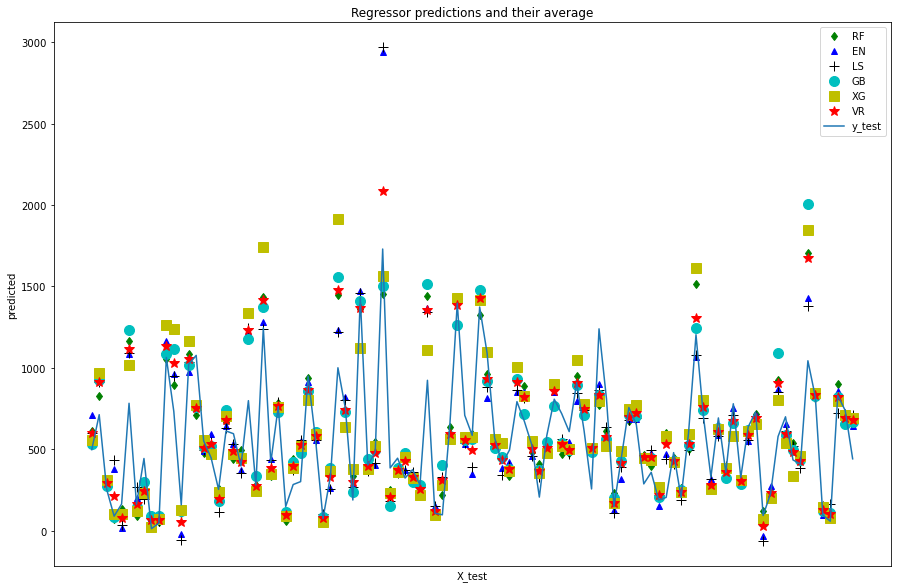

VotingRegressor MAE        :  109.70780691376434
RandomForestRegressor MAE  :  115.66980582524272
ElasticNet MAE             :  120.101102333828
Lasso MAE                  :  120.91031852568806
GradientBoost MAE          :  117.02132505060902
XGBoost MAE                :  131.2903552009064


In [57]:
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)
pred4 = reg4.predict(X_test)
pred5 = reg5.predict(X_test)
pred9 = ereg.predict(X_test)

plt.figure(figsize = (15,10))
plt.plot(pred1, 'gd', label='RF')
plt.plot(pred2, 'b^', label='EN')
plt.plot(pred3, 'k+', ms=10, label='LS')
plt.plot(pred4, 'co', ms=10, label='GB')
plt.plot(pred5, 'ys', ms=10, label='XG')

plt.plot(pred9, 'r*', ms=10, label='VR')
plt.plot(y_test.values, label = 'y_test')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('X_test')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()
print('VotingRegressor MAE        : ',mean_absolute_error(y_test, pred9))
print('RandomForestRegressor MAE  : ',mean_absolute_error(y_test, pred1))
print('ElasticNet MAE             : ',mean_absolute_error(y_test, pred2))
print('Lasso MAE                  : ',mean_absolute_error(y_test, pred3))
print('GradientBoost MAE          : ',mean_absolute_error(y_test, pred4))
print('XGBoost MAE                : ',mean_absolute_error(y_test, pred5))

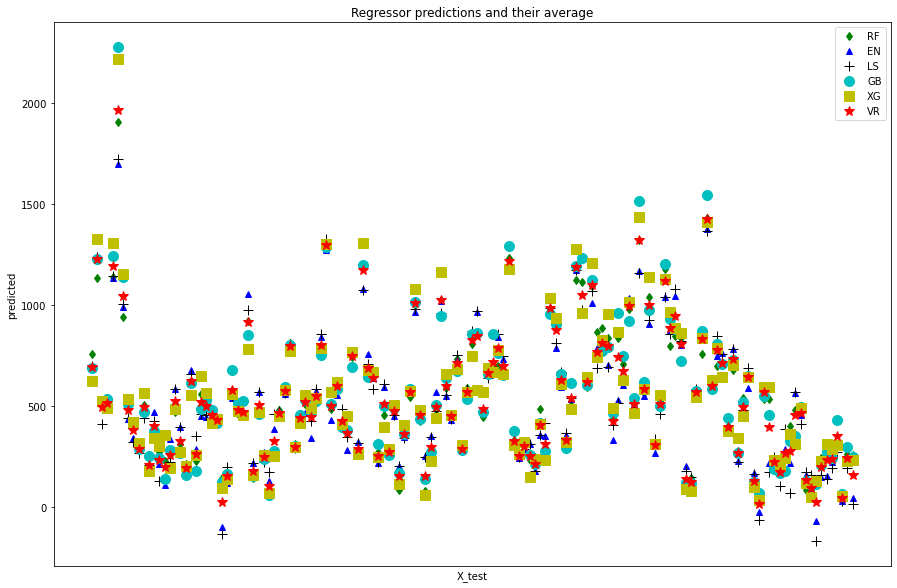

In [58]:
pred1 = reg1.predict(Xx.iloc[:,1:])
pred2 = reg2.predict(Xx.iloc[:,1:])
pred3 = reg3.predict(Xx.iloc[:,1:])
pred4 = reg4.predict(Xx.iloc[:,1:])
pred5 = reg5.predict(Xx.iloc[:,1:])
pred9 = ereg.predict(Xx.iloc[:,1:])

plt.figure(figsize = (15,10))
plt.plot(pred1, 'gd', label='RF')
plt.plot(pred2, 'b^', label='EN')
plt.plot(pred3, 'k+', ms=10, label='LS')
plt.plot(pred4, 'co', ms=10, label='GB')
plt.plot(pred5, 'ys', ms=10, label='XG')

plt.plot(pred9, 'r*', ms=10, label='VR')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('X_test')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [59]:
pred9

array([ 691.84289055, 1230.10797507,  494.08231138,  514.97241835,
       1193.12719948, 1965.91209876, 1046.75980527,  481.50759194,
        380.21738383,  287.69973125,  495.93481243,  206.51128804,
        403.05830228,  230.59548375,  195.32111908,  258.08209828,
        523.11768072,  328.24703654,  192.57677768,  624.81598124,
        261.1347116 ,  521.57711898,  500.75323395,  452.97930342,
        432.53218784,   25.81751199,  153.27002687,  581.28051844,
        480.19748727,  471.48547299,  917.17745212,  176.98162959,
        506.10947663,  247.84445019,  102.05158015,  328.4338926 ,
        467.02334915,  573.27354165,  796.82946132,  297.15249879,
        441.93709372,  519.22637319,  443.62371374,  547.50408059,
        803.65745356, 1298.22663741,  499.4363309 ,  598.05734241,
        426.74593995,  367.0826072 ,  746.67091296,  288.41981832,
       1171.34953669,  689.96602607,  640.11381289,  253.65226202,
        511.10407505,  271.29790079,  474.8059511 ,  154.75791

In [212]:
pd.DataFrame((Xx.iloc[:,0],pred9)).T.to_csv('0727_try1_result.csv')

In [60]:
X_train.columns

Index(['총세대수', '아파트세대수', '상가세대수', '공가수', '지하철', '버스', '단지내주차면수', '초장기세대수',
       '장기세대수', '단기세대수', '공급유형_exL', '공급유형_S', '공급유형_L', '국민임대_세대수',
       '공공임대(50년)_세대수', '영구임대_세대수', '임대상가_세대수', '공공임대(10년)_세대수',
       '공공임대(분납)_세대수', '장기전세_세대수', '공공분양_세대수', '행복주택_세대수', '공공임대(5년)_세대수',
       'ABEGH_세대수', 'A_세대수', 'ACEFI_세대수', 'D_세대수', 'JKLMNO_세대수', '전용면적_10_세대수',
       '전용면적_20_세대수', '전용면적_30_세대수', '전용면적_40_세대수', '전용면적_50_세대수',
       '전용면적_60_세대수', '전용면적_70_세대수', '전용면적_80_세대수', '임대건물구분_아파트', '임대건물구분_상가',
       '00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대',
       '100대', '1인당자동차', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시',
       '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object')

In [74]:
from sklearn.ensemble import VotingRegressor
result_models = pd.DataFrame(columns = ['RFR','LASSO','ELASTICNET','GRADIENT','XGB','Voting'])
reg1 = RandomForestRegressor(random_state=1)
reg2 = ElasticNet(random_state=1)
reg3 = Lasso(random_state=1)
reg4 = GradientBoostingRegressor(random_state=1)
reg5 = XGBRegressor(random_state=1)

for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    reg1.fit(X_train, y_train)
    reg2.fit(X_train, y_train)
    reg3.fit(X_train, y_train)
    reg4.fit(X_train, y_train)
    reg5.fit(X_train, y_train)

    ereg = VotingRegressor([('rf', reg1), ('en', reg2), ('ls', reg3), ('gb', reg4), ('xg', reg5)])
    ereg.fit(X_train, y_train)
    
    a=[]

    a.append(round(mean_absolute_error(y_test, reg1.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg2.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg3.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg4.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, reg5.predict(X_test)),3))
    a.append(round(mean_absolute_error(y_test, ereg.predict(X_test)),3))


    result_models.loc[len(result_models)] = a
result_models.mean()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2472021.936928062, tolerance: 4211.393582792208
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1993569.182705678, tolerance: 4211.393582792208
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

RFR           122.47990
LASSO         119.45520
ELASTICNET    119.15236
GRADIENT      123.62520
XGB           132.46650
Voting        114.14094
dtype: float64

In [76]:
result_models

,RFR,LASSO,ELASTICNET,GRADIENT,XGB,Voting
0,142.804,123.817,121.178,141.970,164.796,130.917
1,130.628,120.583,115.946,132.325,146.198,122.680
2,120.687,120.709,119.325,125.707,131.746,115.590
3,124.360,137.123,146.871,119.105,125.491,112.163
4,130.866,126.150,147.918,139.308,147.841,116.302
5,124.280,107.986,104.439,122.032,132.283,111.168
6,116.671,123.827,120.918,118.677,132.888,109.495
7,121.167,122.958,117.563,114.397,132.231,112.316
8,117.652,110.035,108.826,112.856,125.210,109.775
9,113.970,108.048,110.501,113.402,129.738,106.779


In [72]:
from sklearn.metrics import r2_score

In [75]:
def fit_rfr_reg(X_train, X_test, y_train, y_test):
    # fit RandomForest regression model and return MAE and R squared values
    model_k = RandomForestRegressor()
    model_k.fit(X_train,y_train.values.ravel())
    MAE = mean_absolute_error(y_test, model_k.predict(X_test))
    R_squared = r2_score(y_test, model_k.predict(X_test))
    return MAE, R_squared

In [76]:
from tqdm import tnrange, tqdm_notebook
import itertools

In [78]:
k = 66
MAE_list, R_squared_list, feature_list = [], [], []
numb_features = []



for k in tqdm_notebook(range(66, 0, -1), desc = 'Loop...'):
    counter = k
    counter1 = 1
    for combo in itertools.combinations(X.columns, k):
        tmp_result = fit_rfr_reg(X_train[list(combo)],X_test[list(combo)], y_train, y_test)
        MAE_list.append(tmp_result[0])
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))
        print(counter, counter1)
        counter1 += 1

        
df = pd.DataFrame({'numb_features':numb_features,
                  'MAE':MAE_list,
                  'R_squared':R_squared_list,
                  'features':feature_list})

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


Loop...:   0%|          | 0/66 [00:00<?, ?it/s]

66 1
65 1
65 2
65 3
65 4
65 5
65 6
65 7
65 8
65 9
65 10
65 11
65 12
65 13
65 14
65 15
65 16
65 17
65 18
65 19
65 20
65 21
65 22
65 23
65 24
65 25
65 26
65 27
65 28
65 29
65 30
65 31
65 32
65 33
65 34
65 35
65 36
65 37
65 38
65 39
65 40
65 41
65 42
65 43
65 44
65 45
65 46
65 47
65 48
65 49
65 50
65 51
65 52
65 53
65 54
65 55
65 56
65 57
65 58
65 59
65 60
65 61
65 62
65 63
65 64
65 65
65 66
64 1
64 2
64 3
64 4
64 5
64 6
64 7
64 8
64 9
64 10
64 11
64 12
64 13
64 14
64 15
64 16
64 17
64 18
64 19
64 20
64 21
64 22
64 23
64 24
64 25
64 26
64 27
64 28
64 29
64 30
64 31
64 32
64 33
64 34
64 35
64 36
64 37
64 38
64 39
64 40
64 41
64 42
64 43
64 44
64 45
64 46
64 47
64 48
64 49
64 50
64 51
64 52
64 53
64 54
64 55
64 56
64 57
64 58
64 59
64 60
64 61
64 62
64 63
64 64
64 65
64 66
64 67
64 68
64 69
64 70
64 71
64 72
64 73
64 74
64 75
64 76
64 77
64 78
64 79
64 80
64 81
64 82
64 83
64 84
64 85
64 86
64 87
64 88
64 89
64 90
64 91
64 92
64 93
64 94
64 95
64 96
64 97
64 98
64 99
64 100
64 101
64 102
64

KeyboardInterrupt: 

In [ ]:
df_min = df[df.groupby('numb_features')['MAE'].transform(min) == df['MAE']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(5))
display(df_max.head(5))

In [ ]:
df['min_MAE'] = df.groupby('numb_features')['MAE'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

In [ ]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('MAE')
ax.set_title('MAE - Best subset selection')
ax.plot(df.numb_features,df.min_MAE,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()